# 1. Set up and load data

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import seaborn as sns
import cv2  # For image preprocessing

In [2]:
# Loading Kaggle MNIST data from drive
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


X = (42000, 784), y = (42000,), X_predict = (28000, 784)


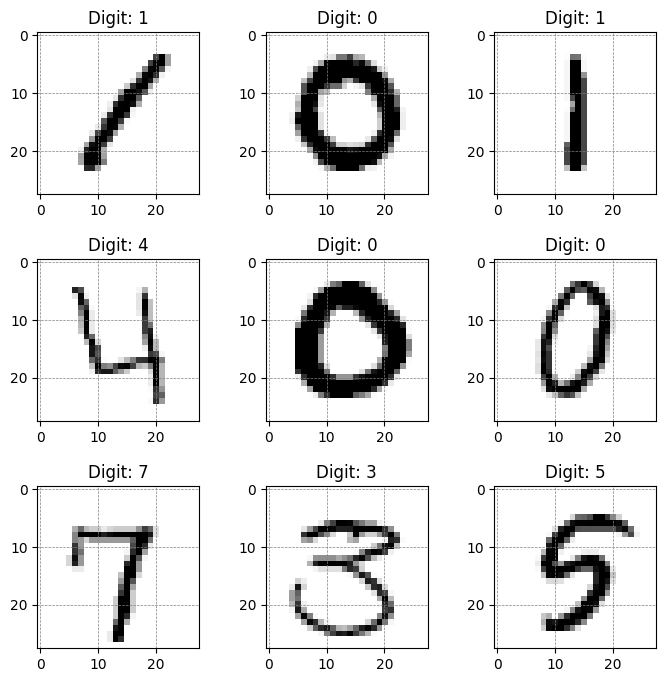

In [3]:
# Shuffeling training data
train_shuffled = shuffle(train.values, random_state=0)

# Extracting features as X and labels as y for train and test data
X = train.drop(labels = ["label"],axis = 1)
y = train["label"]

# Loading prediction data (no labels are provided)
X_predict = test.values

print(f'X = {X.shape}, y = {y.shape}, X_predict = {X_predict.shape}')

# Split data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Plotting some digits
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    image = X.iloc[i].values.reshape(28, 28)
    ax.imshow(image, cmap='binary')
    ax.set(title = f"Digit: {y[i]}")
    ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


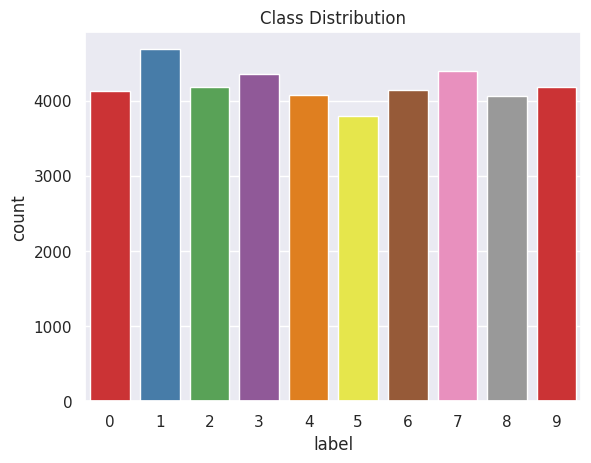

In [4]:
# Exploring the class distribution (almost equally distributed)

sns.set(style="darkgrid")
sns.countplot(x='label', hue='label', data=train, palette='Set1', legend=False)
plt.title("Class Distribution")
plt.show()

In [5]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Applying PCA

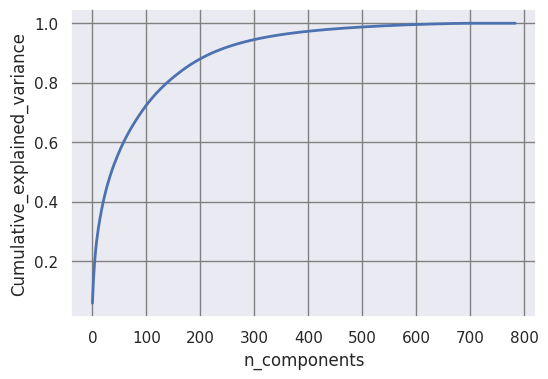

In [7]:
pca = PCA(n_components=784)

# Fit and transform the data
pca_X_train = pca.fit_transform(X_train_scaled)
pca_X_test = pca.transform(X_test_scaled)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid(True, color = 'gray' )
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

In [8]:
pca = PCA(n_components= 200)
pca_X_train = pca.fit_transform(X_train_scaled)
pca_X_test = pca.transform(X_test_scaled)
print(f'{pca.explained_variance_} \n Number of PCA Vectors = {len(pca.explained_variance_)}' )


[40.77768498 29.17570644 26.71966838 20.89579906 18.14865081 15.84904248
 13.90093163 12.44648483 11.04059011 10.09169671  9.6306046   8.63546332
  8.07978207  7.86964178  7.43377511  7.17730571  6.73602346  6.62684221
  6.38896881  6.25593367  5.89898096  5.77070923  5.5328099   5.31554016
  5.21084144  4.9385159   4.89425001  4.71024629  4.49222627  4.42758404
  4.32575829  4.23602207  4.08471626  4.07076424  4.02132504  3.86082054
  3.80611614  3.71957091  3.60288249  3.44779582  3.42938001  3.37891848
  3.24492845  3.22774053  3.20977904  3.15447868  3.11363103  3.07668663
  3.04751429  3.00951194  2.9540629   2.91232493  2.88164853  2.81519486
  2.78866925  2.72947912  2.70143684  2.65718821  2.63861857  2.57939854
  2.56164316  2.53529634  2.48195266  2.40398753  2.39723636  2.36190476
  2.34357129  2.31672946  2.29521955  2.24942827  2.24059818  2.19459407
  2.18900389  2.14388897  2.13348954  2.11214515  2.08594975  2.05747639
  2.05016122  2.02666157  2.01887671  2.00954395  1

In [9]:
#New X_train and y_train
print(f"pca_X_train: {pca_X_train.shape}")
print(f"pca_X_train: {pca_X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

pca_X_train: (31500, 200)
pca_X_train: (10500, 200)
y_train: (31500,)
y_test: (10500,)


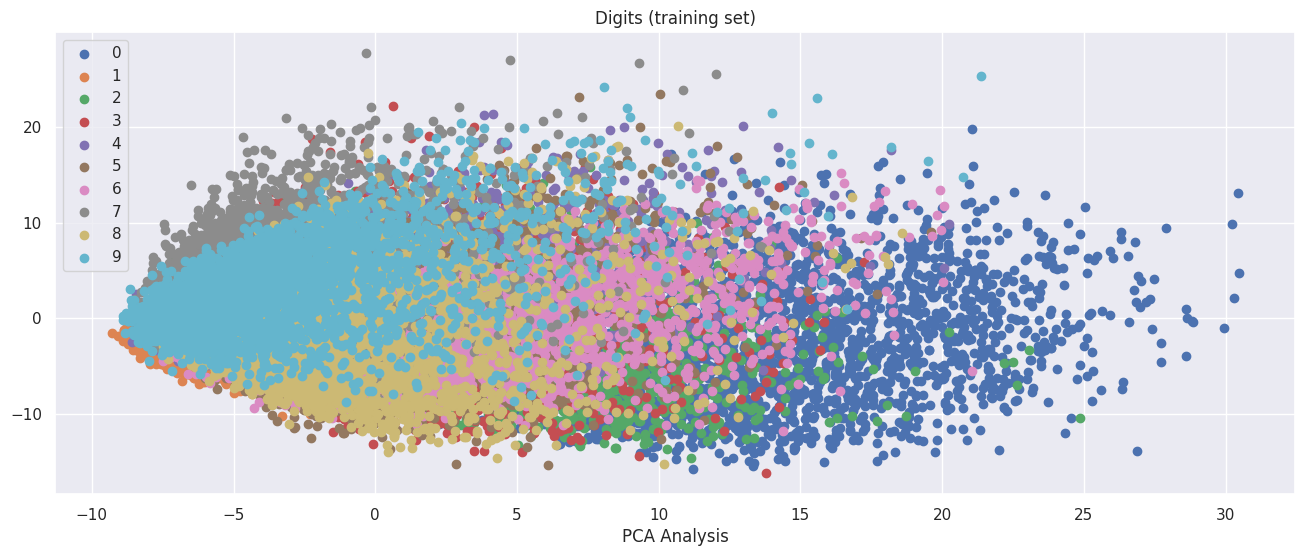

In [10]:
# PCA sactter graph
f, ax = plt.subplots(1, 1)
for i in range(10):
  ax.scatter(pca_X_train[y_train == i, 0], pca_X_train[y_train == i, 1], label=i)
ax.set_xlabel("PCA Analysis")
ax.legend()
f.set_size_inches(16, 6)
ax.set_title("Digits (training set)")
plt.show()

# 3. Training model

In [ ]:
# # Finding best gamma and C for RBF kernel
# # Result: gamma =  0.00728932024638, C = 2.82842712475

# # from sklearn.svm import SVC
# # from sklearn.model_selection import StratifiedShuffleSplit
# # from sklearn.model_selection import GridSearchCV

# # Set up the SVM model with RBF kernel
# svm_rbf = SVC(kernel='rbf', class_weight='balanced')

# # Use GridSearchCV to find the best parameters (C and gamma)
# C_range = np.logspace(-10, 10, 10)
# gamma_range = np.logspace(-10, 10, 10)
# param_grid = dict(gamma=gamma_range, C=C_range)

# grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, n_jobs=-1, verbose=3)  # Use 3-fold cross-validation for faster processing

# # Fit the model using GridSearchCV
# grid_search.fit(X_train_pca, y_train)

# # Get the best parameters
# print(f"Best parameters found: {grid_search.best_params_}")

# # Evaluate the model on the test set
# y_pred = grid_search.predict(X_test_pca)

# # Test accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")

# # 10. Print classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Optionally: Visualize some of the predictions
# fig, axes = plt.subplots(2, 5, figsize=(10, 5))
# for ax, i in zip(axes.ravel(), range(10)):
#     ax.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')  # Reshape back to 28x28 for visualization
#     ax.set_title(f"Pred: {y_pred[i]}")
#     ax.axis('off')
# plt.show()


In [11]:
classifier = svm.SVC(kernel = 'rbf', gamma=0.00728932024638, C=2.82842712475)
classifier.fit(pca_X_train, y_train)

SVC(C=2.82842712475, gamma=0.00728932024638)

In [12]:
# Calculating the training accuracy (to measure the bias)
train_accuracy = classifier.score(pca_X_train, y_train)
print (f"Training Accuracy: {train_accuracy*100:.3f}%")

# Getting predictions
predictions = classifier.predict(pca_X_test)

Training Accuracy: 99.959%


# 4. Testing final model on unseen training dataset

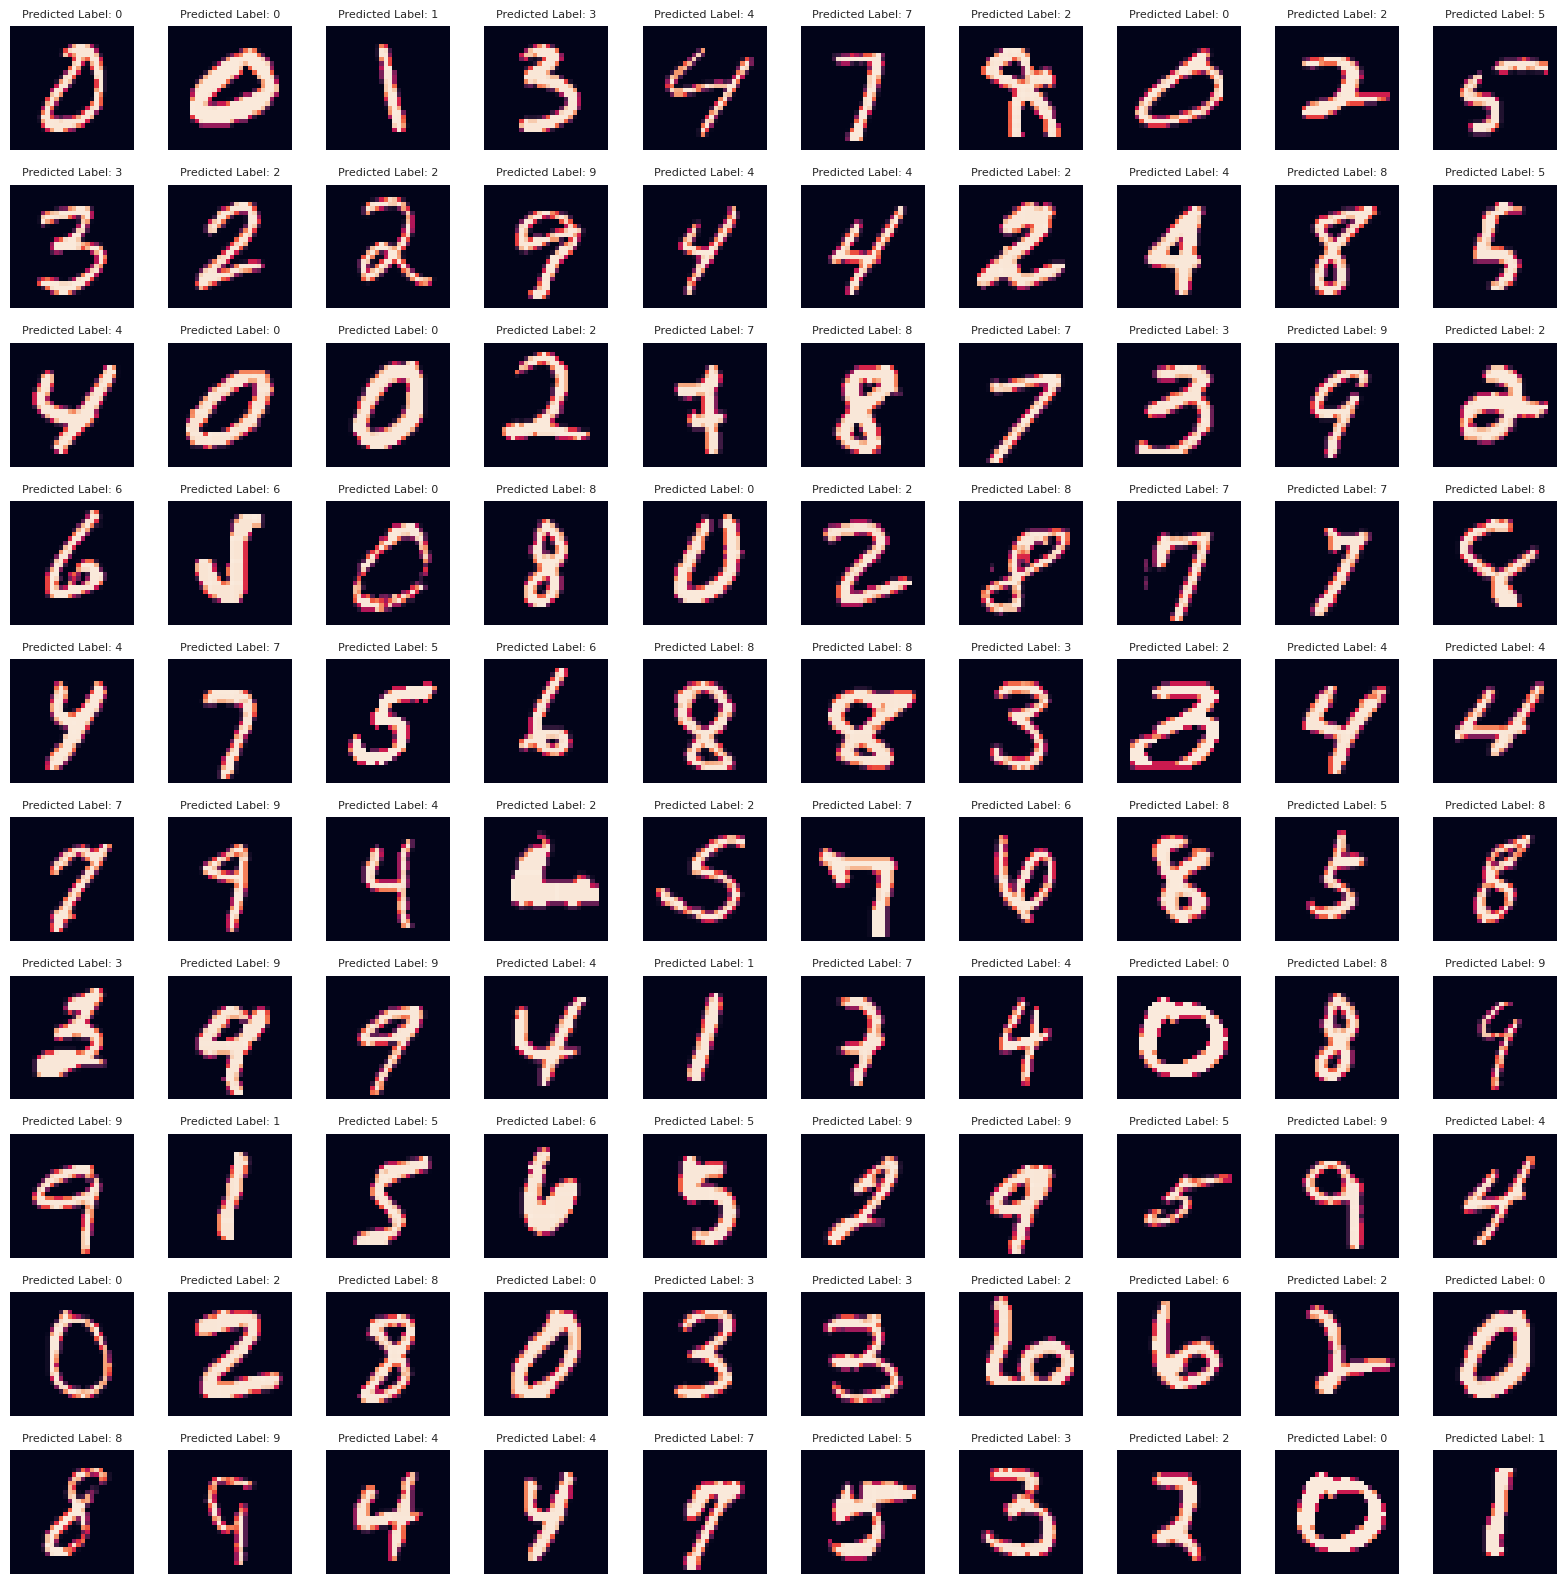

In [17]:
y_pred = classifier.predict(pca_X_test)
# Generate 5 random indices within the valid range of X_test
df = np.random.randint(0, X_test.shape[0], 100)

# Calculate the number of rows and columns for the subplot grid
num_rows = 10
num_cols = 10

plt.figure(figsize=(16, 16))
for i, j in enumerate(df):
    plt.subplot(num_rows, num_cols, i + 1)
    d = X_test.iloc[j].values.reshape(28, 28)
    plt.title(f'Predicted Label: {y_pred[j]}', fontsize=8)
    plt.imshow(d)
    plt.axis('off')
plt.tight_layout()
plt.show()